In [1]:
%matplotlib inline

In [2]:
cd ..

/home/andre/Projects/stocks


In [3]:
from matplotlib import pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import struct
import datetime
import calendar
import time
import argparse
import seaborn as sns
from algos.util import progressbar
from algos import meta5Ibov
import scipy
import random

In [4]:
pwd

'/home/andre/Projects/stocks'

In [5]:
# import os

# os.system('gcc -std=gnu99 -c metaEngine.c -DBUILD_DLL -o metaEngine.o')
# os.system('gcc -shared -o metaengine.dll metaEngine.o -Wl,--out-implib,metaEngine.a')

In [6]:
from algos.backtest import strategyTester
#import metaEngine as me
from algos.backtest.metaEngine import *

In [7]:
import os

if os.name == 'nt':
    meta5Ibov.setDataPath(r'C:\Users\alferreira\Documents\stocks\data', 
                        r'C:\Users\alferreira\Documents\stocks\data')
else:
    meta5Ibov.setDataPath(r'/home/andre/Projects/stocks/data', 
                        r'/home/andre/Projects/stocks/data')

Master data loaded size (minutes):  509471
symbols loaded:
['BBAS3' 'DOL$' 'VALE3' 'ABEV3' 'ITUB4' 'B3SA3' 'BBDC4' 'PETR4' 'WIN@']


In [8]:
loaded = meta5Ibov.loadMeta5Data(suffix='M1.mt5bin', verbose=False)
bars = meta5Ibov.getSymbol('WIN@')

Using previous loaded data!


In [9]:
winticks = strategyTester.createTicks(bars)

In [10]:
np.set_printoptions(formatter={'float': '{: >5.0f}'.format})

In [11]:
winticks.shape

(1528413, 4)

In [12]:
np.max(winticks[:60*7*3, 1])

80118.0

#### Order types just to remember 

<img src="order-types.png" alt="Italian Trulli" width="300" height="400">

#### Call-back function jitted with **Numba** > 1000x faster than non-jitted version

All-ticks 9 seconds to 55 ms

Altough: 

1. AssertionError: Keyword arguments are not supported, yet
2. can only import metaEngine module with import *
3. bug cannot print insert numba call-back function 

In [13]:
from numba import cfunc, types, carray

#@cfunc(types.void(types.CPointer(types.double))) # 1000x faster
def onTickFunc(tick):
    tick = np.ctypeslib.as_array(tick, shape=(4,)) # without numba callback
    #tick = carray(tick, (4)) # with numba callback use this # 1000x faster
    time, price = tick[:2]
    if time == 1388660700:
        sendOrder(Order_Kind_Buy, price, 3., -1., -1., 20, -1, 0)
    if time == 1388661060:
        posticket = 0
        sendOrder(Order_Kind_Sell, price, 3, -1, -1, 20, posticket, 0)    
    if time > 1388661060+60*10 and time < 1388661060+60*11: # 60 minutes after
        sendOrder(Order_Kind_BuyLimit, 78915., 6, -1, 79000, 40, -1, 0)
    print(time, price, nOrders())  # numba callback BUG cannot print      

In [14]:
%%time
pmoney = Simulator(winticks[:60*7*3], onTickFunc, cnumba=False)

1388657160.0 80088.0 0
1388657185.0 80049.0 0
1388657215.0 80118.0 0
1388657220.0 80080.0 0
1388657269.0 80080.0 0
1388657277.0 80034.0 0
1388657280.0 80041.0 0
1388657283.0 80010.0 0
1388657307.0 80057.0 0
1388657340.0 80049.0 0
1388657357.0 80049.0 0
1388657373.0 80018.0 0
1388657400.0 80034.0 0
1388657426.0 79632.0 0
1388657432.0 80041.0 0
1388657460.0 79725.0 0
1388657511.0 79810.0 0
1388657514.0 79710.0 0
1388657520.0 79787.0 0
1388657540.0 79887.0 0
1388657551.0 79694.0 0
1388657580.0 79856.0 0
1388657603.0 79949.0 0
1388657618.0 79818.0 0
1388657640.0 79833.0 0
1388657654.0 79671.0 0
1388657698.0 79864.0 0
1388657700.0 79679.0 0
1388657709.0 79501.0 0
1388657733.0 79686.0 0
1388657760.0 79548.0 0
1388657769.0 79486.0 0
1388657779.0 79548.0 0
1388657820.0 79517.0 0
1388657827.0 79486.0 0
1388657869.0 79594.0 0
1388657880.0 79594.0 0
1388657920.0 79609.0 0
1388657932.0 79563.0 0
1388657940.0 79571.0 0
1388657957.0 79640.0 0
1388657975.0 79563.0 0
1388658000.0 79578.0 0
1388658046.

1388666433.0 78892.0 0
1388666460.0 78861.0 0
1388666483.0 78784.0 0
1388666502.0 78869.0 0
1388666520.0 78799.0 0
1388666545.0 78869.0 0
1388666574.0 78799.0 0
1388666580.0 78869.0 0
1388666597.0 78838.0 0
1388666623.0 78938.0 0
1388666640.0 78838.0 0
1388666650.0 78892.0 0
1388666676.0 78830.0 0
1388666700.0 78884.0 0
1388666701.0 78861.0 0
1388666745.0 78930.0 0
1388666760.0 78907.0 0
1388666790.0 78930.0 0
1388666808.0 78869.0 0
1388666820.0 78900.0 0
1388666826.0 78938.0 0
1388666842.0 78869.0 0
1388666880.0 78876.0 0
1388666883.0 78807.0 0
1388666928.0 78892.0 0
1388666940.0 78815.0 0
1388666958.0 78807.0 0
1388666975.0 78869.0 0
1388667000.0 78838.0 0
1388667009.0 78861.0 0
1388667016.0 78792.0 0
1388667060.0 78830.0 0
1388667091.0 78784.0 0
1388667109.0 78853.0 0
1388667120.0 78830.0 0
1388667143.0 78853.0 0
1388667160.0 78792.0 0
1388667180.0 78846.0 0
1388667199.0 78869.0 0
1388667224.0 78807.0 0
1388667240.0 78815.0 0
1388667263.0 78869.0 0
1388667278.0 78792.0 0
1388667300.

In [15]:
nDeals(), nPositions(), nOrders()

(6, 0, 0)

In [16]:
print(BookIndexes)

{'OK': 0, 'OP': 1, 'OV': 2, 'SL': 3, 'TP': 4, 'DI': 5, 'TK': 6, 'OS': 7, 'PP': 8, 'PV': 9, 'PT': 10, 'PK': 11, 'PC': 12, 'DT': 13, 'DV': 14, 'DR': 15, 'DE': 16}


In [17]:
Orders.shape

(100, 17)

In [22]:
df = pd.DataFrame(Deals, columns=BookIndexes.keys())

In [23]:
df

,OK,OP,OV,SL,TP,DI,TK,OS,PP,PV,PT,PK,PC,DT,DV,DR,DE
0,0.0,79270.0,3.0,-1.0,-1.0,20.0,-1.0,0.0,79285.0,3.0,1.388661e+09,0.0,0.000000e+00,1.388661e+09,3.0,0.0,0.0
1,0.0,79270.0,3.0,-1.0,-1.0,20.0,-1.0,0.0,79285.0,3.0,1.388661e+09,0.0,1.388661e+09,1.388661e+09,3.0,61.0,1.0
2,6.0,78915.0,6.0,-1.0,79000.0,40.0,-1.0,0.0,78915.0,6.0,1.388664e+09,0.0,1.388661e+09,1.388664e+09,6.0,0.0,0.0
3,6.0,78915.0,6.0,-1.0,79000.0,40.0,-1.0,0.0,78915.0,6.0,1.388664e+09,0.0,0.000000e+00,1.388664e+09,6.0,0.0,0.0
4,6.0,78915.0,6.0,-1.0,79000.0,40.0,-1.0,0.0,78915.0,6.0,1.388664e+09,0.0,1.388664e+09,1.388664e+09,6.0,-8.0,1.0
5,6.0,78915.0,6.0,-1.0,79000.0,40.0,-1.0,0.0,78915.0,6.0,1.388664e+09,0.0,1.388664e+09,1.388664e+09,6.0,-72.8,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0


In [24]:
Positions[:5, BookIndexes['PT']]

array([1388663953, 1388663953,     0,     0,     0])

In [25]:
Deals[:5, BookIndexes['PT']]

array([1388660736, 1388660736, 1388663888, 1388663953, 1388663888])

In [26]:
Orders[:5, BookIndexes['OP']]

array([79015, 79031,     0,     0,     0])

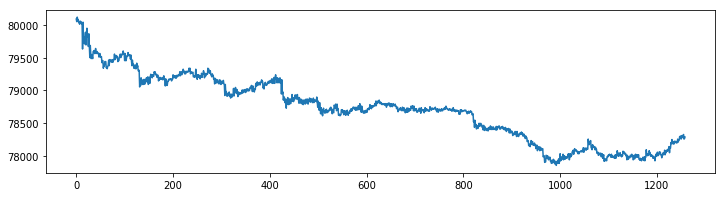

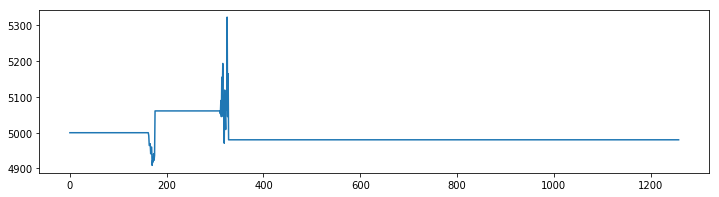

In [27]:
mxtime = len(pmoney[:-1])
plt.figure(figsize=(12, 3))
plt.plot(winticks[:mxtime, 1])
plt.figure(figsize=(12, 3))
plt.plot(pmoney[:-1])